# CLL Finals - Letter Friendship Bracelets

In [1]:
import sys
!{sys.executable} -m pip install https://cdn.evilmadscientist.com/dl/ad/public/AxiDraw_API.zip

  Using cached https://cdn.evilmadscientist.com/dl/ad/public/AxiDraw_API.zip (382 kB)
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Processing /private/var/folders/hn/9gstvl9x339_z9qt0l3mrr9m0000gp/T/pip-req-build-glskg_u_/prebuilt_dependencies/axidrawinternal-3.9.6-py2.py3-none-any.whl (from axicli==3.9.6)
axidrawinternal is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [2]:
from pyaxidraw import axidraw
import vsketch
from bezmerizing import Polyline
import random

In [3]:
import json

In [4]:
import json

In [5]:
all_data = json.load(open("./hersheytext.json"))

In [6]:
all_data.keys()

dict_keys(['astrology', 'cursive', 'cyrillic', 'futural', 'futuram', 'gothiceng', 'gothicger', 'gothicita', 'greek', 'japanese', 'markers', 'mathlow', 'mathupp', 'meteorology', 'music', 'scriptc', 'scripts', 'symbolic', 'timesg', 'timesi', 'timesib', 'timesr', 'timesrb'])

In [7]:
futural = all_data['futural']['chars']

In [8]:
def idx(ch):
    return ord(ch) - 33

In [9]:
futural[idx('g')]

{'d': 'M15,8 L15,24 14,27 13,28 11,29 8,29 6,28 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19',
 'o': 10}

In [10]:
def dch(font, ch):
    if ch == ' ':
        return 'M8,0'
    else:
        return font[idx(ch)]['d']
print(dch(futural, 'a'))
print(dch(futural, ' '))

M15,8 L15,22 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19
M8,0


In [11]:
import numpy as np
def to_plist(font, ch):
    plines = []
    current_plist = []
    mode = ''
    for t in dch(font, ch).split():
        if t[0] in ('M', 'L'):
            mode = t[0]
            t = t[1:]
        coords = [int(x) for x in t.split(',')]
        if mode == 'M':
            if len(current_plist) > 0:
                plines.append(current_plist)
                current_plist = []
        current_plist.append(coords)
    plines.append(current_plist)
    return plines

In [12]:
x_plist = to_plist(futural, "x")
x_plist

[[[3, 8], [14, 22]], [[14, 8], [3, 22]]]

In [13]:
sheared_plist = []
angle = np.pi * -0.25
# iterate over every stroke
for pline in to_plist(futural, 'R'):
    sheared_stroke = []
    # every coordinate in this stroke
    for coord in pline:
        sheared_stroke.append([coord[0]+angle*coord[1], coord[1]])
    # append to the transformed list of polylines
    sheared_plist.append(sheared_stroke)

In [14]:
def str_to_plist(font, s, kern=1):
    current_x = 0
    all_plines = []
    for ch in s:
        max_x = 0
        for pline in to_plist(font, ch):
            # translate to the current position of cursor
            translated = [[x+current_x, y] for x, y in pline]
            x_extent = max([c[0] for c in pline])
            if x_extent > max_x:
                max_x = x_extent
            all_plines.append(translated)
        current_x += max_x + kern
    return all_plines

In [15]:
str_plist = str_to_plist(futural, "zit tix")
str_plist

[[[14, 8], [3, 22]],
 [[3, 8], [14, 8]],
 [[3, 22], [14, 22]],
 [[18, 1], [19, 2], [20, 1], [19, 0], [18, 1]],
 [[19, 8], [19, 22]],
 [[26, 1], [26, 18], [27, 21], [29, 22], [31, 22]],
 [[23, 8], [30, 8]],
 [[40, 0]],
 [[46, 1], [46, 18], [47, 21], [49, 22], [51, 22]],
 [[43, 8], [50, 8]],
 [[55, 1], [56, 2], [57, 1], [56, 0], [55, 1]],
 [[56, 8], [56, 22]],
 [[61, 8], [72, 22]],
 [[72, 8], [61, 22]]]

In [16]:
from itertools import chain
def str_to_plist_wrap(font, s, kern=1, lineheight=32, width=360, height=360):
    current = [0, 0]
    all_plists = []
    for word in s.split():
        wplist = str_to_plist(font, word, kern)
        # flatten the list of strokes to find the biggest X coordinate
        wplist_width = max([c[0] for c in chain(*wplist)])
        if current[0] + wplist_width > width:
            current[1] += lineheight
            current[0] = 0
        if current[1] > height - lineheight:
            break
        wplist_translated = []
        # translate all polylines
        for pline in wplist:
            wplist_translated.append(
                [[x+current[0], y+current[1]] for x, y in pline])
        # add these translated strokes to the big list
        all_plists.extend(wplist_translated)
        current[0] += wplist_width + 8 # width of space
    return all_plists

### Changing the parameters to generate a 'bead' by combining the glyphs of both the names

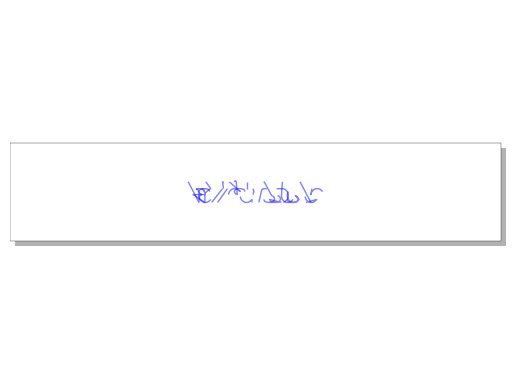

In [17]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 1:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(22):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    with vsk.pushMatrix():
        vsk.translate(-50 + i * 3, 0)
        vsk.scale(0.5)
        vsk.polygon(smooshed)
vsk.display()
vsk.save("k2&caroline2.svg")

### Generating 2 bands with the string (but only having 1 bead didn't really show the letter combining)

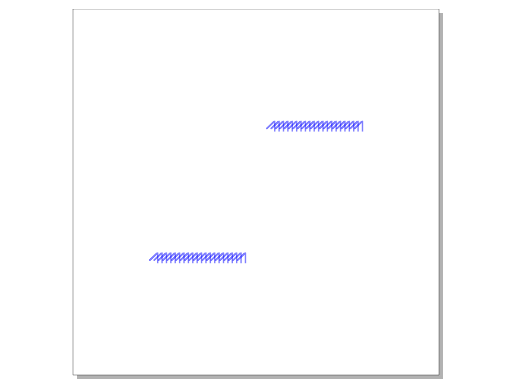

In [18]:


chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "250mm")
vsk.scale("1mm")
for i in range(1):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(21):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 3, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(40 + j * 3, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()
vsk.save("curvyletters.svg")

## Changed parameters till i could see a bit of the letters in it

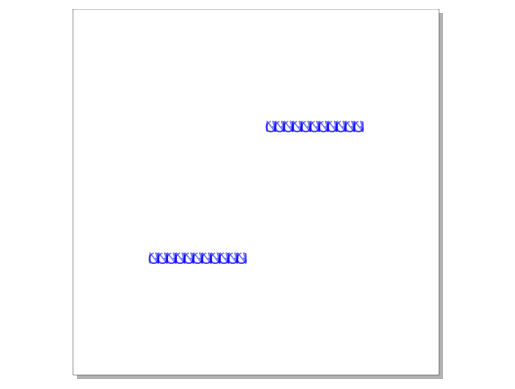

In [39]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "250mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(40 + j * 6, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()


In [20]:
vsk.save("k2&me.svg")

## 3 friends

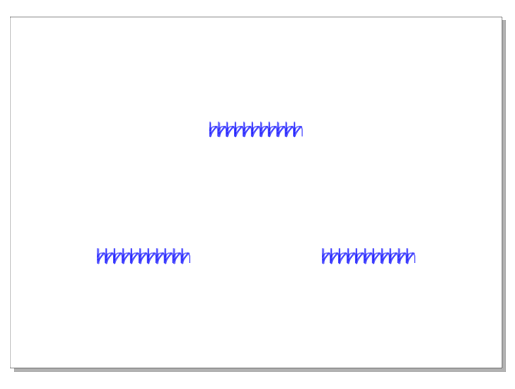

In [21]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
chars += chars.lower()
chars += 'siyan'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("350mm", "250mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-80 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(0 + j * 6, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(80 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()


In [22]:
vsk.save("k2&me&siyan.svg")

## four friends, had to increase the stroke length when number of people increased

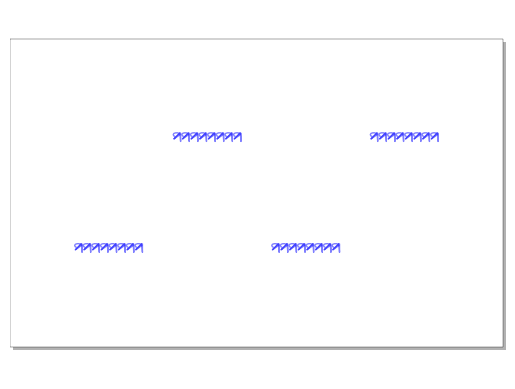

In [23]:
chars = 'sidikha'
chars += chars.lower()
chars += 'caroline'
chars += chars.lower()
chars += 'joyce'
chars += chars.lower()
chars += 'nathan'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 11:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("400mm", "250mm")
vsk.scale("1mm")
for i in range(2):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(8):
        with vsk.pushMatrix():
            vsk.translate(-140 + j * 7, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(-60 + j * 7, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(20 + j * 7, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(100 + j * 7, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()

In [24]:
vsk.save("sid-car-joy-nat.svg")

## five friends

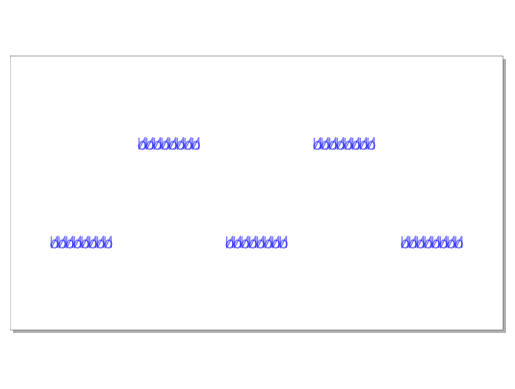

In [25]:
chars = 'sidikha'
chars += chars.lower()
chars += 'caroline'
chars += chars.lower()
chars += 'joyce'
chars += chars.lower()
chars += 'nathan'
chars += chars.lower()
chars += 'isabel'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural, item)
    for stroke in plist:
        if len(stroke) >= 11:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("450mm", "250mm")
vsk.scale("1mm")
for i in range(2):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(8):
        with vsk.pushMatrix():
            vsk.translate(-140 + j * 7, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(-60 + j * 7, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(20 + j * 7, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(100 + j * 7, -10)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
        with vsk.pushMatrix():
            vsk.translate(180 + j * 7, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()

In [26]:
vsk.save("sid-car-joy-nat-isa2.svg")

## Experimented with different font styles 

In [27]:
all_data.keys()

dict_keys(['astrology', 'cursive', 'cyrillic', 'futural', 'futuram', 'gothiceng', 'gothicger', 'gothicita', 'greek', 'japanese', 'markers', 'mathlow', 'mathupp', 'meteorology', 'music', 'scriptc', 'scripts', 'symbolic', 'timesg', 'timesi', 'timesib', 'timesr', 'timesrb'])

## timesrb

In [28]:
futural5 = all_data['timesrb']['chars']

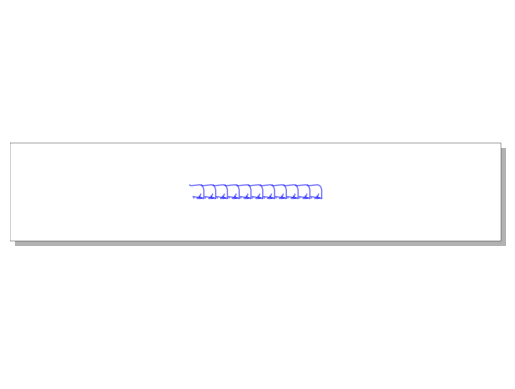

In [29]:
#'symbolic', 'timesg', 'timesi', 'timesib', 'timesr', 'timesrb'

chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural5, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()

## scriptc (reminds me of the ones we had as a kid)

In [30]:
futural4 = all_data['scriptc']['chars']

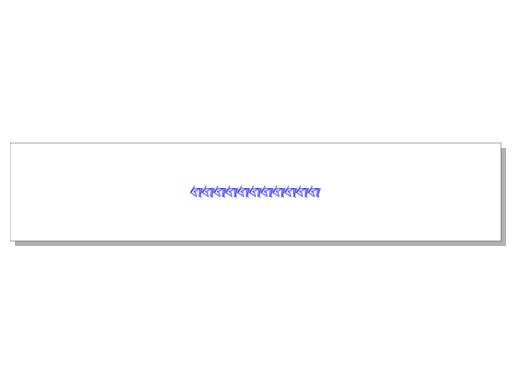

In [31]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural4, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()

## mathupp

In [32]:
futural3 = all_data['mathupp']['chars']

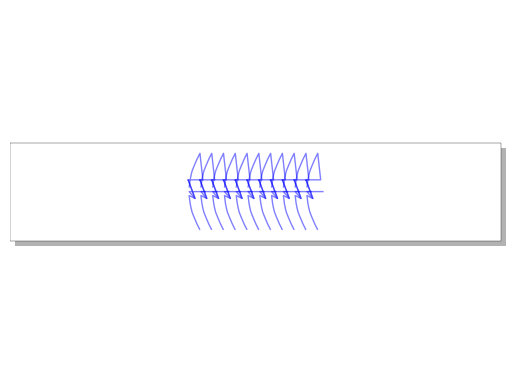

In [33]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural3, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()

## gothicger

In [34]:
futural2 = all_data['gothicger']['chars']

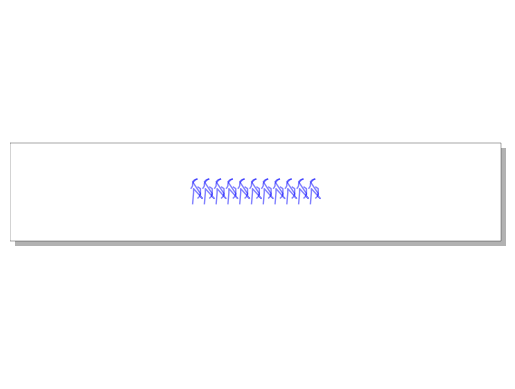

In [35]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural2, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()

## cyrillic

In [36]:
futural1 = all_data['cyrillic']['chars']

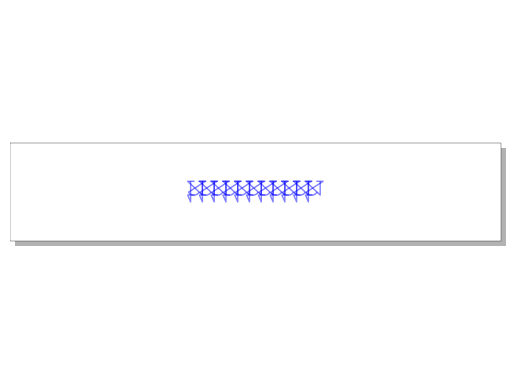

In [37]:
chars = 'krishna'
chars += chars.lower()
chars += 'caroline'
all_strokes = []
for item in chars:
    plist = str_to_plist(futural1, item)
    for stroke in plist:
        if len(stroke) >= 6:
            # first half of polyline
            all_strokes.append(stroke[:int(len(stroke)/2)])
            # second half of polyline
            all_strokes.append(stroke[int(len(stroke)/2):])
        else:
            all_strokes.append(stroke)

import random
vsk = vsketch.Vsketch()
vsk.size("250mm", "50mm")
vsk.scale("1mm")
for i in range(3):
    strokes = random.sample(all_strokes, 2)
    smooshed = list(chain(*strokes))
    for j in range(11):
        with vsk.pushMatrix():
            vsk.translate(-40 + j * 6, 80)
            vsk.scale(0.5)
            vsk.polygon(smooshed)
vsk.display()